In [16]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima


In [17]:
data = pd.read_csv('report.csv')

In [18]:
data.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


In [19]:
data.shape

(2829, 15)

In [20]:
len(data['report_year'].unique())

41

In [21]:
data.reset_index(drop=True)

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,2015,OK07205,"Tulsa, OK",401520.0,3628.0,55.0,365.0,2354.0,854.0,NaN,903.57,13.70,90.90,586.27,212.69
2825,2015,VA12800,"Virginia Beach, VA",452797.0,626.0,19.0,103.0,234.0,270.0,NaN,138.25,4.20,22.75,51.68,59.63
2826,2015,DCMPD00,"Washington, DC",672228.0,8084.0,162.0,494.0,4024.0,3404.0,NaN,1202.57,24.10,73.49,598.61,506.38
2827,2015,KS08703,"Wichita, KS",389824.0,3839.0,27.0,349.0,2730.0,733.0,NaN,984.80,6.93,89.53,700.32,188.03


In [22]:
data.isnull().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64

In [23]:
data.isnull().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64

In [24]:
data=data[['report_year','agency_jurisdiction','assaults_percapita']]

In [25]:
data.head()

,report_year,agency_jurisdiction,assaults_percapita
0,1975,"Albuquerque, NM",472.68
1,1975,"Arlington, TX",117.36
2,1975,"Atlanta, GA",717.10
3,1975,"Aurora, CO",333.46
4,1975,"Austin, TX",154.13


In [26]:
df=data.loc[data['agency_jurisdiction'] == 'Washington, DC']

In [27]:
df.head()

,report_year,agency_jurisdiction,assaults_percapita
66,1975,"Washington, DC",392.74
135,1976,"Washington, DC",378.77
204,1977,"Washington, DC",375.94
273,1978,"Washington, DC",377.74
342,1979,"Washington, DC",451.83


In [28]:
df.isnull().sum()

report_year            0
agency_jurisdiction    0
assaults_percapita     0
dtype: int64

In [29]:
df.reset_index(drop=True)

,report_year,agency_jurisdiction,assaults_percapita
0,1975,"Washington, DC",392.74
1,1976,"Washington, DC",378.77
2,1977,"Washington, DC",375.94
3,1978,"Washington, DC",377.74
4,1979,"Washington, DC",451.83
5,1980,"Washington, DC",509.42
6,1981,"Washington, DC",539.62
7,1982,"Washington, DC",577.65
8,1983,"Washington, DC",585.23
9,1984,"Washington, DC",657.62


In [31]:
hc=df[['report_year','assaults_percapita']]
hc.set_index('report_year',inplace=True)
hc.shape

(41, 1)

In [32]:
hc.head()

,assaults_percapita
report_year,
1975,392.74
1976,378.77
1977,375.94
1978,377.74
1979,451.83


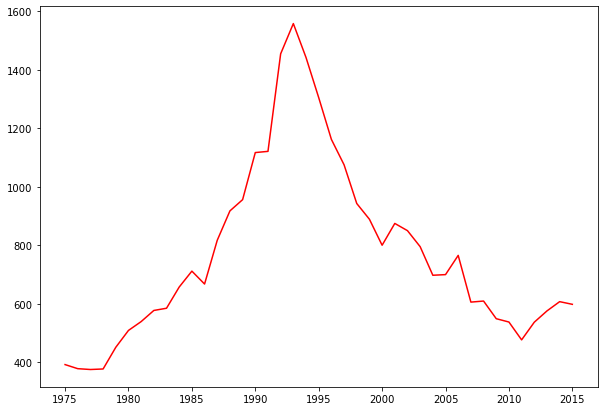

In [33]:
plt.figure(figsize=(10,7))
plt.plot(hc,'r-')

In [34]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(hc)


(0.577891875835347, True)

In [35]:
from statsmodels.tsa.stattools import adfuller

In [36]:
result = adfuller(hc, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -1.9530373091225683
n_lags: 0.30753633494448845
p-value: 0.30753633494448845
Critial Values:
   1%, -3.6155091011809297
Critial Values:
   5%, -2.941262357486514
Critial Values:
   10%, -2.6091995013850418


In [37]:
train=hc[:35]
test=hc[34:]

In [38]:
train.tail()

,assaults_percapita
report_year,
2005,700.06
2006,765.74
2007,606.16
2008,609.80
2009,549.48


In [39]:
test.head()

,assaults_percapita
report_year,
2009,549.48
2010,538.12
2011,477.19
2012,537.54
2013,576.07


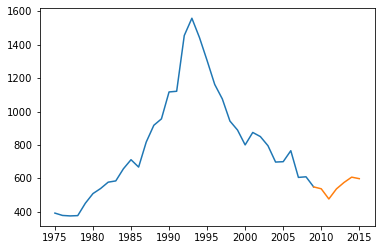

In [40]:
plt.plot(train)
plt.plot(test)

C:\Users\manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\manish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


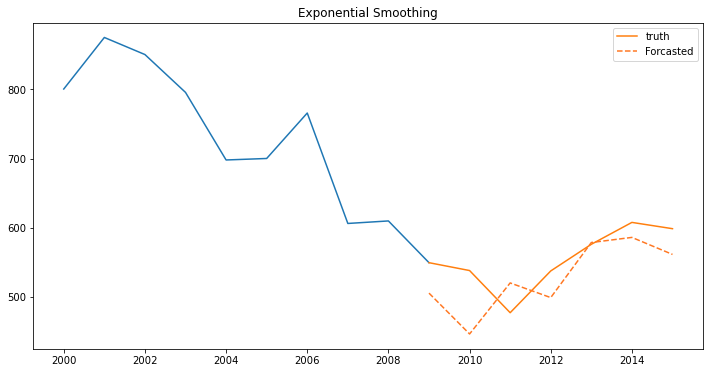

In [82]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=11)
#model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True)
fit = model.fit()
pred = fit.forecast(7)
#fit2 = model2.fit()
#pred2 = fit2.forecast(7)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
#sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[:35], train.values[25:35]);
ax.plot(test.index, test.values, label='truth');
ax.plot(test.index, pred, linestyle='--', color='#ff7823',label="Forcasted".format(sse1, fit.aic));
#ax.plot(test.index, pred2, linestyle='--', color='#3c763d',label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic)); 
ax.legend();
ax.set_title("Exponential Smoothing");

In [78]:
from sklearn.metrics import r2_score
r2_score(test, pred)

-0.31630923638068764

In [61]:
arima_model =  auto_arima(train,start_p=2, d=1, start_q=2, 
                          max_p=10, max_d=5, max_q=7, start_P=1, 
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=0, m=15, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,random_state=40,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,0)[15] intercept   : AIC=415.610, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[15] intercept   : AIC=413.921, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[15] intercept   : AIC=411.042, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[15] intercept   : AIC=413.374, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[15]             : AIC=411.992, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[15] intercept   : AIC=412.312, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[15] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(1,0,0)[15] intercept   : AIC=412.244, Time=0.12 sec
 ARIMA(2,1,0)(1,0,0)[15] intercept   : AIC=412.136, Time=0.21 sec
 ARIMA(1,1,1)(1,0,0)[15] intercept   : AIC=412.406, Time=0.23 sec
 ARIMA(0,1,1)(1,0,0)[15] intercept   : AIC=411.909, Time=0.14 sec
 ARIMA(2,1,1)(1,0,0)[15] intercept   : AIC=414.135, Time=0.28 sec
 ARIMA(1,1,0)(1,0,0)[15]             : AIC=409.143, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[15]             : AIC=410.333, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[15]             

In [62]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   35
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 15)   Log Likelihood                -201.572
Date:                            Fri, 08 Jan 2021   AIC                            409.143
Time:                                    23:03:44   BIC                            413.722
Sample:                                         0   HQIC                           410.705
                                             - 35                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3104      0.281      1.105      0.269      -0.240       0.861
ar.S.L15      -0.3212      0.223     -1.439      0.150      -0.759       0.116
sigma2      7840.0879   1124.727      6.971      0.000    5635.664       1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                25.50
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                             1.34
Prob(H) (two-sided):                  0.08   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 7),index=test.index)
prediction.columns = ['predicted_assaults_percapita']
prediction

,predicted_assaults_percapita
report_year,
2009,563.223001
2010,599.631859
2011,624.597506
2012,666.155413
2013,683.155807
2014,711.577722
2015,687.630803


Predicted Assaults_percapita Crime Rates of Washington DC 


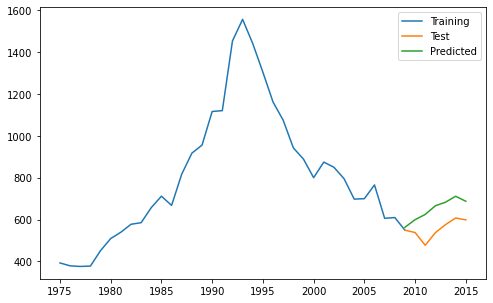

In [83]:
print("Predicted Assaults_percapita Crime Rates of Washington DC ")
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import r2_score
r2_score(test['assaults_percapita'], prediction['predicted_assaults_percapita'])


-5.139725399783899